In [1]:
 import tensorflow as tf
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)


In [2]:
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
df=tfds.load('fashion_mnist',split='train')
df

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.FJIQ4J_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.FJIQ4J_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [3]:
df.as_numpy_iterator().next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

In [4]:
## viz data and build dataset

In [5]:
import numpy as np
dataiterator=df.as_numpy_iterator().next()['image']
dataiterator

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

In [6]:
# fig,ax=plt.subplots(3,3,figsize=(10,10))
# for idx in range(4):
#   batch=next(dataiterator)
#   ax[idx].imshow(np.squeeze(batch['image']))


In [7]:
## Build a neural network

In [8]:
## scale and return images only
def scale_images(data):
  image=data['image']
  return image/255


In [9]:
def scale_images(example):
    image = example['image']
    label = example['label']
    return tf.cast(image, tf.float32) / 255.0, label

ds = tfds.load('fashion_mnist', split='train')
ds = ds.map(scale_images)
ds = ds.cache()
ds = ds.shuffle(buffer_size=1000)
ds = ds.batch(32)
ds = ds.prefetch(tf.data.AUTOTUNE)

In [10]:
### Build the neural network

In [11]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential

In [12]:
## Build Generator

In [13]:
def build_generator():
  model=Sequential()
  model.add(Dense(7*7*128,input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))
  ##unsampling block2
  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))
  ##unsampling block 3
  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))
  ## conv layer to get to one channel
  model.add(Conv2D(1,7,activation='sigmoid',padding='same'))
  return model

In [14]:
# model.summary()

In [15]:
generator=build_generator()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
generator.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6272)           │       809,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 14, 14, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 1)      │         6,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,634,817 (6.24 MB)

 Trainable params: 1,634,817 (6.24 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
img=generator.predict(np.random.randn(4,128,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


In [18]:
# fig,ax=plt.subplots(3,3,figsize=(10,10))
# for idx in range(4):
#   sample=dataitertor.next()
#   ax[idx].imshow(np.squeeze(sample['image'])) #28*28
#   ax[idx].title.set_text(sample['label'])

In [19]:
## build discriminator

In [20]:
def build_discriminator():
    model = Sequential()
    model.add(Input(shape=(28,28,1)))   # grayscale input
    model.add(Conv2D(32, (5,5), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    model.add(Conv2D(64, (5,5), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    model.add(Conv2D(128, (5,5), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    model.add(Conv2D(256, (5,5), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(1, activation="sigmoid"))
    return model

In [21]:
discriminator=build_discriminator()
discriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 3, 3, 256)      │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         2,305 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,078,785 (4.12 MB)

 Trainable params: 1,078,785 (4.12 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
discriminator.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


array([[0.49618202],
       [0.4961489 ],
       [0.49605253],
       [0.49610782]], dtype=float32)

In [23]:
img=img[0]

In [24]:
img.shape

(28, 28, 1)

In [25]:
discriminator(np.expand_dims(img,0))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.49618202]], dtype=float32)>

In [26]:
## construct training loop

In [27]:
## setup loss and optimizers

In [28]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [29]:
g_opt=Adam(learning_rate=0.0001)
d_opt=Adam(learning_rate=0.0001)

In [30]:
g_loss=BinaryCrossentropy()
d_loss=BinaryCrossentropy()

In [31]:
## Build subclass model

In [32]:
from tensorflow.keras.models import Model

In [33]:
class FashionGAN(Model):
    def __init__(self, generator, discriminator, latent_dim=128):
        super().__init__()
        self.generator = generator
        self.discriminator = discriminator
        self.latent_dim = latent_dim

    def compile(self, g_opt, d_opt, g_loss, d_loss):
        super().compile()
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss

    def train_step(self, data):
        # data is (images, labels) from dataset
        real_images, _ = data
        batch_size = tf.shape(real_images)[0]

        # Generate fake images
        random_latent = tf.random.normal(shape=(batch_size, self.latent_dim))
        fake_images = self.generator(random_latent, training=True)

        # --- Train Discriminator ---
        with tf.GradientTape() as d_tape:
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images, training=True)

            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            y_realfake = tf.concat(
                [tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0
            )

            # Add noise to labels
            noise = 0.15 * tf.random.normal(shape=tf.shape(y_realfake))
            y_realfake += noise

            total_d_loss = self.d_loss(y_realfake, yhat_realfake)

        d_gradient = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(d_gradient, self.discriminator.trainable_variables))

        # --- Train Generator ---
        with tf.GradientTape() as g_tape:
            gen_images = self.generator(tf.random.normal(shape=(batch_size, self.latent_dim)), training=True)
            predicted_labels = self.discriminator(gen_images, training=True)

            total_g_loss = self.g_loss(tf.ones_like(predicted_labels), predicted_labels)

        g_gradient = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(g_gradient, self.generator.trainable_variables))

        return {"d_loss": total_d_loss, "g_loss": total_g_loss}

In [34]:
## create instance of subclass model
fashgan=FashionGAN(generator,discriminator)

In [35]:
## compile the model
fashgan.compile(g_opt,d_opt,g_loss,d_loss)

In [36]:
## Build call back

In [37]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [38]:
class ModelMonitor(Callback):
  def __init__(self,num_img=3,latent_dim=128):
    self.num_img=num_img
    self.latent_dim=latent_dim
  def on_epoch_end(self,epoch,logs=None):
    random_latent_vectors=tf.random.uniform(shape=(self.num_img,self.latent_dim))
    generated_images=self.model.generator(random_latent_vectors)
    generated_images*=255
    generated_images.numpy()
    for i in range(self.num_img):
      img=array_to_img(generated_images[i])
      img.save(f"generated_img{epoch}-{i}.png")

In [39]:
## Train

In [40]:
df.as_numpy_iterator().next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

In [41]:
## Train
hist=fashgan.fit(ds,epochs=3,callbacks=[ModelMonitor()])

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6567s 3s/step - d_loss: 0.0101 - g_loss: 0.0389
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6366s 3s/step - d_loss: -0.0082 - g_loss: 1.7122e-09
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6562s 3s/step - d_loss: 9.7440e-04 - g_loss: 1.0393e-10


In [42]:
## review the performance
hist.history

{'d_loss': [-0.21403038501739502, 0.10965749621391296, 0.994414210319519],
 'g_loss': [1.0697647212509764e-09,
  4.722140456436819e-10,
  1.1501342933595282e-10]}

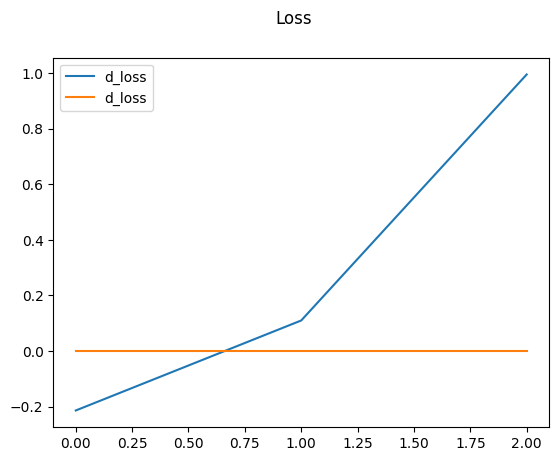

In [43]:
import matplotlib.pyplot as plt
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'],label='d_loss')
plt.plot(hist.history['g_loss'],label='d_loss')
plt.legend()
plt.show()


In [44]:
## Generate images

In [56]:
# generator.load_weights(os.path.join('models','generator.h5'))
# discriminator.load_weights(os.path.join('models','discriminator.h5'))

In [46]:
imgs=generator.predict(np.random.randn(4,128,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


In [47]:
imgs

array([[[[2.24254630e-03],
         [2.37361062e-04],
         [1.65890215e-05],
         ...,
         [1.39466692e-05],
         [1.57328206e-04],
         [1.12137792e-03]],

        [[3.09248338e-04],
         [1.46837201e-05],
         [4.08539478e-07],
         ...,
         [2.54320724e-07],
         [7.07335312e-06],
         [1.04791521e-04]],

        [[2.48032247e-05],
         [4.99603004e-07],
         [5.73501735e-09],
         ...,
         [3.73462461e-09],
         [2.94575472e-07],
         [1.01642172e-05]],

        ...,

        [[2.24782270e-05],
         [5.93652373e-07],
         [1.83144664e-08],
         ...,
         [2.06917306e-07],
         [1.02607128e-05],
         [2.60934728e-04]],

        [[1.48195701e-04],
         [7.12120527e-06],
         [4.22857880e-07],
         ...,
         [4.26753240e-06],
         [9.81356206e-05],
         [1.50779588e-03]],

        [[1.15052250e-03],
         [1.04812818e-04],
         [1.33889107e-05],
         ...,
 

In [ ]:
## save the model

In [ ]:
fig,ax=plt.subplots(ncols=4,figsize=(10,10))
for r in range(4):
  for c in range(4):
    ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

In [ ]:
## save the model

In [48]:
generator.save(os.path.join('models','generator.h5'))
discriminator.save(os.path.join('models','discriminator.h5'))

In [51]:
imgs=generator.predict(tf.random.normal((4,128,1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


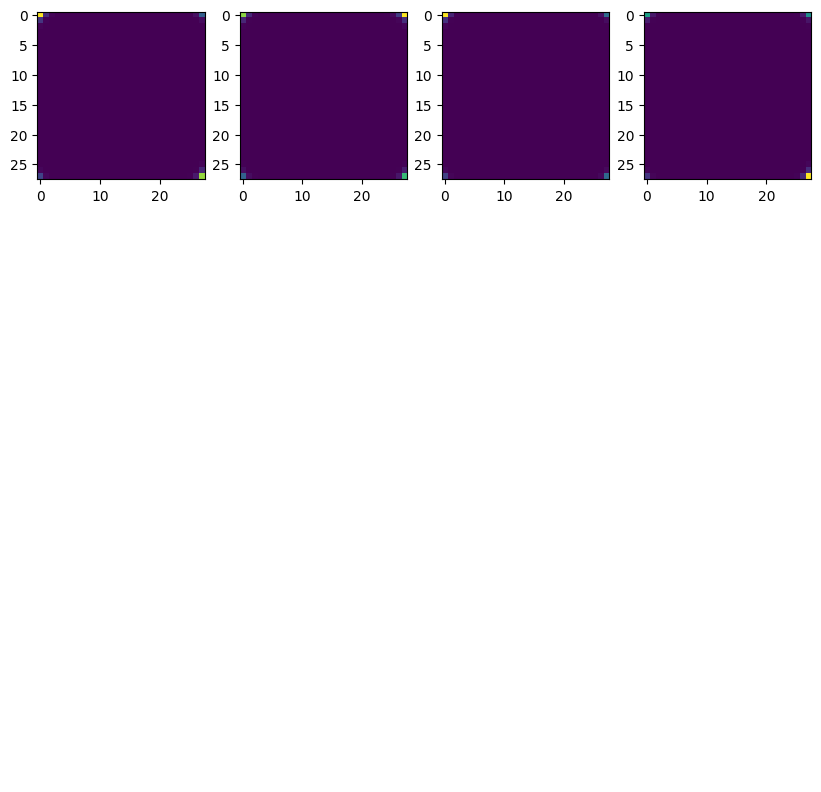

In [55]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(10,10))

for i in range(len(imgs)):
    r, c = divmod(i, 4)   # row and column
    ax[r, c].imshow(imgs[i])
for j in range(len(imgs), 16):
    r, c = divmod(j, 4)
    ax[r, c].axis("off")